## In this NB we are going to study the SNR as a function of the source activity, i.e., the quality of the image as a function of the number of coincidences:

In [1]:
import os
import sys
import numpy as np

import matplotlib.pyplot         as plt
import mlem.mlem_reconstruct     as mr
import antea.image.fom_functions as fomf

sys.stdout = open(os.devnull, "w") ## Prevents from printing

In [2]:
## Configuration for plots ##
plt.rcParams["font.size"]      = 14
plt.rcParams["figure.figsize"] = 10, 7.5

## colors
tableau = [( 31, 119, 180), (174, 199, 232), (255, 127,  14), (255, 187, 120),
           ( 44, 160,  44), (152, 223, 138), (214,  39,  40), (255, 152, 150),
           (148, 103, 189), (197, 176, 213), (140,  86,  75), (196, 156, 148),
           (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
           (188, 189,  34), (219, 219, 141), ( 23, 190, 207), (158, 218, 229), 
           (218,  60,  78), (35,  180, 203)]
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau)):
    r, g, b = tableau[i]
    tableau[i] = (r / 255., g / 255., b / 255.)

blue        = tableau[0]
green       = tableau[4]
fucsia      = tableau[6]
light_red   = tableau[20]
light_blue  = tableau[21]

Paths & parameters:

In [3]:
path_to_mlem     = '/Users/carmenromoluque/tofpet3d/lib/libmlem.so'
reco_prefix_base = '/Users/carmenromoluque/nexus_petit_analysis/full-body-PET/fastsim_reco/images_fastsim/'

th         = '0.5'
tof        = 140
n_coinc    = [8087872, 16512875, 25022441, 33515271, 42031084]
n_files    = [   1000,     2000,     3000,     4000,     5000]
n_iter     = 16
save_every = 2

MLEM reconstruction:

In [4]:
sys.stdout = sys.__stdout__ ## This line prevents from printing
rec_0 = mr.MLEMReconstructor(libpath=path_to_mlem)
rec_1 = mr.MLEMReconstructor(libpath=path_to_mlem)
rec_2 = mr.MLEMReconstructor(libpath=path_to_mlem)
rec_3 = mr.MLEMReconstructor(libpath=path_to_mlem)
rec_4 = mr.MLEMReconstructor(libpath=path_to_mlem)

rec_0.prefix = reco_prefix_base + f'100iter/{th}th/{n_files[0]}coinc/im_th{th}_TOF{str(tof)}ps_{n_coinc[0]}coinc_iter'
rec_1.prefix = reco_prefix_base + f'100iter/{th}th/{n_files[1]}coinc/im_th{th}_TOF{str(tof)}ps_{n_coinc[1]}coinc_iter'
rec_2.prefix = reco_prefix_base + f'100iter/{th}th/{n_files[2]}coinc/im_th{th}_TOF{str(tof)}ps_{n_coinc[2]}coinc_iter'
rec_3.prefix = reco_prefix_base + f'100iter/{th}th/{n_files[3]}coinc/im_th{th}_TOF{str(tof)}ps_{n_coinc[3]}coinc_iter'
rec_4.prefix = reco_prefix_base + f'100iter/{th}th/im_th{th}_TOF{str(tof)}ps_{n_coinc[4]}coinc_iter'

In [5]:
the_imgs0 = []
for i in range(0, n_iter, save_every):
    img = rec_0.read_image(i)
    the_imgs0.append(img)
    
the_imgs1 = []
for i in range(0, n_iter, save_every):
    img = rec_1.read_image(i)
    the_imgs1.append(img)
    
the_imgs2 = []
for i in range(0, n_iter, save_every):
    img = rec_2.read_image(i)
    the_imgs2.append(img)
    
the_imgs3 = []
for i in range(0, n_iter, save_every):
    img = rec_3.read_image(i)
    the_imgs3.append(img)

the_imgs4 = []
for i in range(0, n_iter, save_every):
    img = rec_4.read_image(i)
    the_imgs4.append(img)

## Plot signal to noise ratio (SNR) as a function of the activity

### Image parameters

In [6]:
sig_intensity  =  4
bckg_intensity =  1
radial_pos     = 50.
bckg_radius    =  4.
phi0           = np.pi/6
phi_step       = np.pi/3
n_phi          = 6

hot_radii   = [4., 6.5, 8.5, 11.]
cold_radii  = [14., 18.5]
hot_angles  = [np.pi/3, 2*np.pi/3, 3*np.pi/3, 4*np.pi/3]
cold_angles = [5*np.pi/3, 6*np.pi/3]

x_size = y_size = z_size = 180
x_bins = y_bins = z_bins =  60

In [7]:
all_imgs = [the_imgs0, the_imgs1, the_imgs2, the_imgs3, the_imgs4]

In [8]:
it = 7 # would mean 16

snrs_hot_0,  snrs_hot_1  = [], []
snrs_hot_2,  snrs_hot_3  = [], []
snrs_cold_0, snrs_cold_1 = [], []

err_snrs_hot_0,  err_snrs_hot_1  = [], []
err_snrs_hot_2,  err_snrs_hot_3  = [], []
err_snrs_cold_0, err_snrs_cold_1 = [], []

for i in range(len(all_imgs)):
    snr_hot0, err_hot0 = fomf.snr3d(all_imgs[i][it], hot_radii[0], radial_pos, hot_angles[0], 
                                    bckg_radius, phi0, phi_step, n_phi, x_size, y_size, z_size,
                                    x_bins, y_bins, z_bins)
    snr_hot1, err_hot1 = fomf.snr3d(all_imgs[i][it], hot_radii[1], radial_pos, hot_angles[1], 
                                    bckg_radius, phi0, phi_step, n_phi, x_size, y_size, z_size,
                                    x_bins, y_bins, z_bins)
    snr_hot2, err_hot2 = fomf.snr3d(all_imgs[i][it], hot_radii[2], radial_pos, hot_angles[2], 
                                    bckg_radius, phi0, phi_step, n_phi, x_size, y_size, z_size,
                                    x_bins, y_bins, z_bins)
    snr_hot3, err_hot3 = fomf.snr3d(all_imgs[i][it], hot_radii[3], radial_pos, hot_angles[3], 
                                    bckg_radius, phi0, phi_step, n_phi, x_size, y_size, z_size,
                                    x_bins, y_bins, z_bins)

    snrs_hot_0.append(snr_hot0)
    snrs_hot_1.append(snr_hot1)
    snrs_hot_2.append(snr_hot2)
    snrs_hot_3.append(snr_hot3)
    
    err_snrs_hot_0.append(err_hot0)
    err_snrs_hot_1.append(err_hot1)
    err_snrs_hot_2.append(err_hot2)
    err_snrs_hot_3.append(err_hot3)
    
    snr_cold0, err_cold0 = fomf.crc_cold3d(all_imgs[i][it], cold_radii[0], radial_pos, cold_angles[0], 
                                bckg_radius, phi0, phi_step, n_phi, x_size, y_size, z_size,
                                x_bins, y_bins, z_bins)
    snr_cold1, err_cold1 = fomf.crc_cold3d(all_imgs[i][it], cold_radii[1], radial_pos, cold_angles[1], 
                                bckg_radius, phi0, phi_step, n_phi, x_size, y_size, z_size,
                                x_bins, y_bins, z_bins)

    snrs_cold_0.append(snr_cold0)
    snrs_cold_1.append(snr_cold1)
    
    err_snrs_cold_0.append(err_cold0)
    err_snrs_cold_1.append(err_cold1)

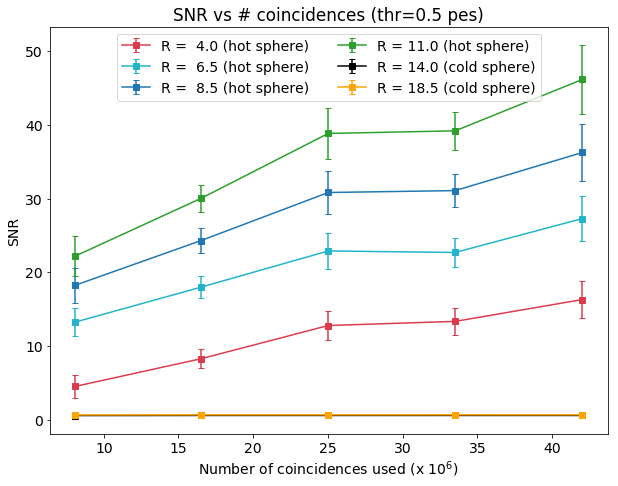

In [9]:
nc = np.array(n_coinc)/1e6
ls = [f'R =  {hot_radii[0]} (hot sphere)', f'R =  {hot_radii[1]} (hot sphere)', f'R =  {hot_radii[2]} (hot sphere)',
      f'R = {hot_radii[3]} (hot sphere)', f'R = {cold_radii[0]} (cold sphere)', f'R = {cold_radii[1]} (cold sphere)']
plt.errorbar(nc, snrs_hot_0,  yerr=err_snrs_hot_0,  xerr=None, label=ls[0], color=light_red,  marker='s', capsize=3)
plt.errorbar(nc, snrs_hot_1,  yerr=err_snrs_hot_1,  xerr=None, label=ls[1], color=light_blue, marker='s', capsize=3)
plt.errorbar(nc, snrs_hot_2,  yerr=err_snrs_hot_2,  xerr=None, label=ls[2], color=blue,     marker='s', capsize=3)
plt.errorbar(nc, snrs_hot_3,  yerr=err_snrs_hot_3,  xerr=None, label=ls[3], color=green,    marker='s', capsize=3)
plt.errorbar(nc, snrs_cold_0, yerr=err_snrs_cold_0, xerr=None, label=ls[4], color='k',      marker='s', capsize=3)
plt.errorbar(nc, snrs_cold_1, yerr=err_snrs_cold_1, xerr=None, label=ls[5], color='orange', marker='s', capsize=3)
plt.title('SNR vs # coincidences (thr=0.5 pes)')
plt.xlabel(f'Number of coincidences used (x $10^6$)')
plt.ylabel('SNR')
#plt.ylim(0, 90)
plt.legend(loc=9, ncol=2);

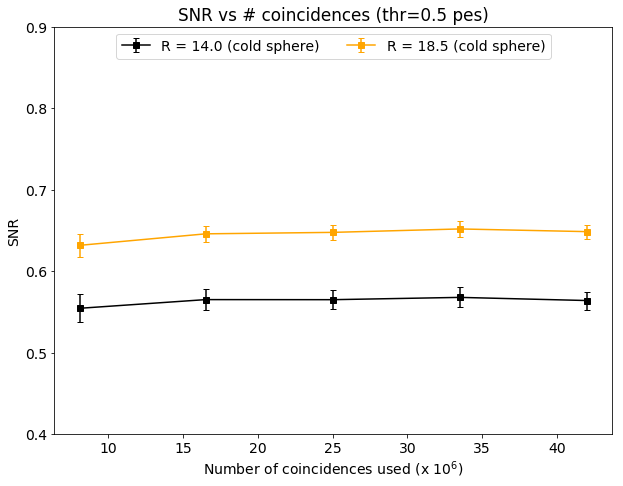

In [12]:
plt.errorbar(nc, snrs_cold_0, yerr=err_snrs_cold_0, xerr=None, label=ls[4], color='k',      marker='s', capsize=3)
plt.errorbar(nc, snrs_cold_1, yerr=err_snrs_cold_1, xerr=None, label=ls[5], color='orange', marker='s', capsize=3)
plt.title('SNR vs # coincidences (thr=0.5 pes)')
plt.xlabel(f'Number of coincidences used (x $10^6$)')
plt.ylabel('SNR')
plt.ylim(0.4, 0.9)
plt.legend(loc=9, ncol=2);